<a href="https://colab.research.google.com/github/toddwalters/pgaiml-python-coding-examples/blob/main/deep-learning/projects/automatingPortOperations/1714053668_ToddWalters_project_automating_port_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <a id='toc1_'></a>[**Automating Port Operations**](#toc0_)

-----------------------------
## <a id='toc1_1_'></a>[**Context**](#toc0_)
-----------------------------

Marina Pier Inc. is leveraging technology to automate their operations on the San Francisco port.
The company’s management has set out to build a bias-free/ corruption-free automatic system that reports & avoids faulty situations caused by human error.

-----------------------------
## <a id='toc1_2_'></a>[**Objectives**](#toc0_)
-----------------------------

Marina Pier wants to use Deep Learning techniques to build an automatic reporting system that recognizes the boat. The company is also looking to use a transfer learning approach of any lightweight pre-trained model in order to deploy in mobile devices.
As a deep learning engineer, your task is to:

1.	Build a CNN network to classify the boat.

2.	Build a lightweight model with the aim of deploying the solution on a mobile device using transfer learning. You can use any lightweight pre-trained model as the initial (first) layer. MobileNetV2 is a popular lightweight pre-trained model built using Keras API.

-----------------------------
## <a id='toc1_3_'></a>[**Dataset**](#toc0_)
-----------------------------

**boat_type_classification_dataset.zip**

The dataset contains images of 9 types of boats. It contains a total of 1162 images. The training images are provided in the directory of the specific class itself.
Classes:

- ferry_boat
- gondola
- sailboat
- cruise_ship
- kayak
- inflatable_boat
- paper_boat
- buoy
- freight_boat


-----------------------------------
## <a id='toc1_4_'></a>[**Analysis Steps to Perform**](#toc0_)
-----------------------------------
1.	Build a CNN network to classify the boat.

    1.1.	Split the dataset into train and test in the ratio 80:20, with shuffle and random state=43.

    1.2.	Use tf.keras.preprocessing.image_dataset_from_directory to load the train and test datasets. This function also supports data normalization.*(Hint: image_scale=1./255)*

    1.3.	Load train, validation and test dataset in batches of 32 using the function initialized in the above step.

    1.4.	Build a CNN network using Keras with the following layers

       - Cov2D with 32 filters, kernel size 3,3, and activation relu, followed by MaxPool2D

       - Cov2D with 32 filters, kernel size 3,3, and activation relu, followed by MaxPool2D

       - GLobalAveragePooling2D layer

       - Dense layer with 128 neurons and activation relu

       - Dense layer with 128 neurons and activation relu
    
       - Dense layer with 9 neurons and activation softmax.

    1.5.	Compile the model with Adam optimizer, categorical_crossentropy loss, and with metrics accuracy, precision, and recall.

    1.6.	Train the model for 20 epochs and plot training loss and accuracy against epochs.

    1.7.	Evaluate the model on test images and print the test loss and accuracy.

    1.8.	Plot heatmap of the confusion matrix and print classification report.

2.	Build a lightweight model with the aim of deploying the solution on a mobile device using transfer learning. You can use any lightweight pre-trained model as the initial (first) layer. MobileNetV2 is a popular lightweight pre-trained model built using Keras API.

    2.1.	Split the dataset into train and test datasets in the ration 70:30, with shuffle and random state=1.

    2.2.	Use tf.keras.preprocessing.image_dataset_from_directory to load the train and test datasets. This function also supports data normalization.*(Hint: Image_scale=1./255)*

    2.3.	Load train, validation and test datasets in batches of 32 using the function initialized in the above step.

    2.4.	Build a CNN network using Keras with the following layers.

      - Load MobileNetV2 - Light Model as the first layer *(Hint: Keras API Doc)*

      - GLobalAveragePooling2D layer

      - Dropout(0.2)

      - Dense layer with 256 neurons and activation relu

      - BatchNormalization layer

      - Dropout(0.1)

      - Dense layer with 128 neurons and activation relu

      - BatchNormalization layer

      - Dropout(0.1)

      - Dense layer with 9 neurons and activation softmax

    2.5.	Compile the model with Adam optimizer, categorical_crossentropy loss, and metrics accuracy, Precision, and Recall.

    2.6.	Train the model for 50 epochs and Early stopping while monitoring validation loss.

    2.7.	Evaluate the model on test images and print the test loss and accuracy.

    2.8.	Plot Train loss Vs Validation loss and Train accuracy Vs Validation accuracy.
    
3.	Compare the results of both models built in steps 1 and 2 and state your observations.



## <a id='toc1_5_'></a>[**1.0 Build A CNN Network To Classify A Boat**](#toc0_)

**Setup: Import Necessary Libraries**

In [ ]:
# !pip install matplotlib seaborn scikit-learn

In [2]:
import pathlib
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Set the path to your dataset
#data_dir = pathlib.Path("boat_type_classification_dataset")
data_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/datasets/boat_type_classification_dataset")

# Set common parameters
batch_size = 32
img_height = 224
img_width = 224

### <a id='toc1_5_1_'></a>[**1.1 Split the dataset into train and test in the ratio 80:20, with shuffle and random state=43**](#toc0_)

In [3]:
# Load and split the full dataset
full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="both",
    seed=43,
    image_size=(img_height, img_width),
    batch_size=None,  # Load without batching initially
    shuffle=True
)

# Split the full dataset into train and test
train_ds, test_ds = full_ds

# Store class names
class_names = train_ds.class_names
num_classes = len(class_names)

print("Number of training samples:", tf.data.experimental.cardinality(train_ds))
print("Number of test samples:", tf.data.experimental.cardinality(test_ds))
print("Class names:", class_names)

Found 1162 files belonging to 9 classes.
Using 930 files for training.
Using 232 files for validation.
Number of training samples: tf.Tensor(930, shape=(), dtype=int64)
Number of test samples: tf.Tensor(232, shape=(), dtype=int64)
Class names: ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']


#### <a id='toc1_5_1_1_'></a>[Explanations](#toc0_)

**Section 1.1** is responsible for loading the dataset and splitting it into training and testing sets.

- We use `tf.keras.preprocessing.image_dataset_from_directory` to load images directly from the filesystem. This function is convenient as it handles the file reading and label assignment automatically.
- We set `validation_split=0.2` and `subset="both"` to get both training and testing sets in an 80:20 ratio.
- `seed=43` ensures reproducibility of the random split.
- `shuffle=True` randomizes the order of the samples, which is important for training neural networks.
- We set `batch_size=batch_size` setting the batch size here means that our dataset will be divided into batches of 32 images each. This is important for several reasons:
  - *Memory Efficiency:* Processing 32 images at a time is more memory-efficient than loading the entire dataset at once, especially for large datasets.
  - *Training Dynamics:* Batch size affects the dynamics of model training. A batch size of 32 is often a good default, balancing between the noisy gradients of very small batches and the longer computation time of larger batches.
  - *Consistency:* By setting the batch size here, we ensure that all parts of our pipeline (data loading, augmentation, model training) use the same batch size.
- The `image_size` parameter resizes all images to a consistent size, which is necessary for batch processing in neural networks.

#### <a id='toc1_5_1_2_'></a>[Why it's important:](#toc0_)

- Properly splitting the data ensures we have separate sets for training and evaluation, which is crucial for assessing the model's performance on unseen data.
- The 80:20 split is a common ratio that balances having enough training data while still retaining a significant portion for testing.
- Shuffling the data helps prevent any bias that might occur from the order of the samples.

### <a id='toc1_5_2_'></a>[**1.2 Use tf.keras.preprocessing.image_dataset_from_directory to load the train and test datasets.**](#toc0_)

This function also supports data normalization. *(Hint: image_scale=1./255)*

In [4]:
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255.0, label

# Apply normalization to the datasets
train_ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

# Function to check normalization
def check_normalization(dataset):
    for images, _ in dataset.take(1):
        print("Image data range:", tf.reduce_min(images).numpy(), "to", tf.reduce_max(images).numpy())

print("Checking train dataset normalization:")
check_normalization(train_ds)
print("\nChecking test dataset normalization:")
check_normalization(test_ds)

Checking train dataset normalization:
Image data range: 0.0 to 1.0

Checking test dataset normalization:
Image data range: 0.0 to 1.0


#### <a id='toc1_5_2_1_'></a>[Explanations](#toc0_)

**Section 1.2** is performing the following:

- Focuses on normalizing the image data and verifying that the normalization was applied correctly.
- Defines a `normalize_img` function that converts the image data from integers in the range [0, 255] to floating-point numbers in the range [0, 1].
- Applies this normalization to both the training and testing datasets using the map function.
- The `check_normalization` function safely checks the range of values in the normalized datasets.

#### <a id='toc1_5_2_2_'></a>[Why it's important](#toc0_)

- Normalization is crucial for neural network training. It helps the model converge faster and can lead to better performance.
- Scaling the input to a standard range (like [0, 1]) ensures that all features contribute equally to the model's learning process.
- Checking the normalization helps verify that our preprocessing steps are working as expected.

### <a id='toc1_5_3_'></a>[**1.3 Load train, validation and test dataset in batches of 32 using the function initialized in the above step.**](#toc0_)

In [5]:
def prepare_dataset(dataset, is_training=False):
    if is_training:
        dataset = dataset.shuffle(buffer_size=1000)

    dataset = dataset.batch(batch_size)

    if is_training:
        data_augmentation = tf.keras.Sequential([
            tf.keras.layers.RandomFlip('horizontal'),
            tf.keras.layers.RandomRotation(0.2),
        ])
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y),
                              num_parallel_calls=tf.data.AUTOTUNE)

    return dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = prepare_dataset(train_ds, is_training=True)
test_ds = prepare_dataset(test_ds)

val_ds = test_ds.take(tf.data.experimental.cardinality(test_ds) // 2)
test_ds = test_ds.skip(tf.data.experimental.cardinality(test_ds) // 2)

print("Number of training batches:", tf.data.experimental.cardinality(train_ds))
print("Number of validation batches:", tf.data.experimental.cardinality(val_ds))
print("Number of test batches:", tf.data.experimental.cardinality(test_ds))

def one_hot_encode(image, label):
    return image, tf.one_hot(tf.cast(label, tf.int32), depth=num_classes)

train_ds = train_ds.map(one_hot_encode)
val_ds = val_ds.map(one_hot_encode)
test_ds = test_ds.map(one_hot_encode)

# Print an example batch to verify the shape
for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    break

Number of training batches: tf.Tensor(30, shape=(), dtype=int64)
Number of validation batches: tf.Tensor(4, shape=(), dtype=int64)
Number of test batches: tf.Tensor(4, shape=(), dtype=int64)
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 9)


#### <a id='toc1_5_3_1_'></a>[Explanations](#toc0_)

**Section 1.3** prepares the datasets for training by applying several important transformations and encodings.

1. **Dataset Preparation:**
   
   - The `prepare_dataset` function applies shuffling (for training data), batching, and data augmentation (for training data).
   - Datasets are split into train, validation, and test sets.

2. **One-Hot Encoding:**

   - After the initial preparation, we apply one-hot encoding to the labels in all datasets (train, validation, and test).
   - The `one_hot_encode` function converts integer labels to one-hot encoded vectors.

3. **Verification:**

   - We print the shapes of images and labels from a batch to verify the encoding and overall data structure.

4. **Batch Retrieval:**

   - A function is provided to safely get a batch from the dataset, which is useful for inspection and debugging.

#### <a id='toc1_5_3_2_'></a>[Why this is important](#toc0_)

1. **Data Preparation:**

   - Proper dataset preparation ensures that the model receives data in the correct format and with appropriate preprocessing.
   - Shuffling the training data helps prevent the model from learning any unintended patterns based on the order of samples.
   - Batching allows for efficient processing during training.
   - Data augmentation helps increase the diversity of the training data, potentially improving model generalization.

2. **One-Hot Encoding:**

   - One-hot encoding is crucial for multi-class classification problems when using categorical crossentropy loss.
   - It converts integer labels (e.g., 0, 1, 2) into vector form (e.g., [1,0,0], [0,1,0], [0,0,1]), which is necessary for the model's output layer and loss function.
   - This encoding ensures that the model's output (a probability distribution over classes) matches the format of the labels.

3. **Verification:**

   - Checking the shapes of the images and labels after preprocessing is vital to catch any issues early.
   - It confirms that the one-hot encoding has been applied correctly and that the data dimensions match what the model expects.

4. **Batch Retrieval:**

   - Having a safe method to retrieve batches allows for easy inspection of the data at various points in the pipeline.
   - This can be crucial for debugging and ensuring that the data fed into the model is correct.


By performing these steps, we ensure that our data is properly prepared, encoded, and verified before being used for model training, which is crucial for the success and efficiency of the subsequent training process.

### <a id='toc1_5_4_'></a>[**1.4.	Build a CNN network using Keras with the following layers**](#toc0_)
- Cov2D with 32 filters, kernel size 3,3, and activation relu, followed by MaxPool2D

- Cov2D with 32 filters, kernel size 3,3, and activation relu, followed by MaxPool2D

- GLobalAveragePooling2D layer

- Dense layer with 128 neurons and activation relu

- Dense layer with 128 neurons and activation relu
- Dense layer with 9 neurons and activation softmax.

In [6]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 global_average_pooling2d (  (None, 32)                0         
 GlobalAveragePooling2D)                                         
                                                      

#### <a id='toc1_5_4_1_'></a>[Explanations](#toc0_)

**Section 1.4** defines and builds the CNN (Convolutional Neural Network) as specified. Here's a breakdown of the architecture:

1. **First Convolutional Layer:**

   - 32 filters with a 3x3 kernel size
   - ReLU activation function
   - Followed by a 2x2 MaxPooling layer

2. **Second Convolutional Layer:**

   - 32 filters with a 3x3 kernel size
   - ReLU activation function
   - Followed by a 2x2 MaxPooling layer

3. **Global Average Pooling Layer:**

   - Reduces the spatial dimensions of the feature maps to a single value per filter

4. **First Dense Layer:**

   - 128 neurons with ReLU activation

5. **Second Dense Layer:**

   - 128 neurons with ReLU activation

6. **Output Layer**:

   - 9 neurons (one for each class) with softmax activation


The `build_cnn_model` function takes the input shape and number of classes as parameters, making it flexible for different image sizes and number of categories.

We then use this function to create our model, passing in the image dimensions and number of classes that we determined from our dataset.

Finally, we print a summary of the model, which will show the layers, their output shapes, and the total number of parameters in the network.

This CNN architecture is designed to:

- Extract features from the images using convolutional layers
- Reduce spatial dimensions and computational load using max pooling
- Convert the 2D feature maps to a 1D feature vector using global average pooling
- Make the final classification using fully connected (dense) layers

### <a id='toc1_5_5_'></a>[1.5.	Compile the model with Adam optimizer, categorical_crossentropy loss, and with metrics accuracy, precision, and recall.](#toc0_)

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

print("Model compiled successfully with the following configuration:")
print(f"Optimizer: Adam")
print(f"Loss function: Categorical Crossentropy")
print(f"Metrics: Accuracy, Precision, Recall")

Model compiled successfully with the following configuration:
Optimizer: Adam
Loss function: Categorical Crossentropy
Metrics: Accuracy, Precision, Recall


#### <a id='toc1_5_5_1_'></a>[Explanations](#toc0_)

**Section 1.5** compiles the CNN model we built in the previous section. Here's a breakdown of what each part does:

1. **Optimizer: Adam**

    - We use the Adam optimizer, which is an adaptive learning rate optimization algorithm.
    - Adam is widely used because it combines the benefits of two other extensions of stochastic gradient descent: AdaGrad and RMSProp.
    - It's generally a good default choice for many deep learning tasks.

2. **Loss Function: Categorical Crossentropy**

    - We use 'categorical_crossentropy' as our loss function.
    - This is appropriate for multi-class classification problems where each sample belongs to exactly one class.
    - It measures the dissimilarity between the predicted probability distribution and the true distribution.

3. **Metrics: Accuracy, Precision, and Recall**

    - *Accuracy:* Measures the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined.
    - *Precision:* Measures the proportion of true positive predictions among all positive predictions. It answers the question: "Of all the samples predicted as positive, how many actually are positive?"
    - *Recall:* Measures the proportion of true positive predictions among all actual positive samples. It answers the question: "Of all the actual positive samples, how many were correctly identified?"

#### <a id='toc1_5_5_2_'></a>[Why these choices are important](#toc0_)

- Adam optimizer is often a good starting point as it adapts the learning rate during training, which can lead to faster convergence.
- Categorical crossentropy is the standard loss function for multi-class classification problems.
- Using multiple metrics (accuracy, precision, and recall) provides a more comprehensive evaluation of the model's performance, especially if the classes are imbalanced.
- This code block compiles the CNN model we built in the previous section. Here's a breakdown of what each part does:

### <a id='toc1_5_6_'></a>[1.6.	Train the model for 20 epochs and plot training loss and accuracy against epochs.](#toc0_)

In [8]:
# Check the shape of a batch from the training dataset
for images, labels in train_ds.take(1):
    print("Shape of images in a batch:", images.shape)
    print("Shape of labels in a batch:", labels.shape)

# Print the model summary again
model.summary()

# Check the number of classes
print("Number of classes:", len(class_names))

# Check if labels are one-hot encoded
if len(labels.shape) == 2 and labels.shape[1] > 1:
    print("Labels are one-hot encoded")
else:
    print("Labels are not one-hot encoded")

Shape of images in a batch: (32, 224, 224, 3)
Shape of labels in a batch: (32, 9)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 global_average_pooling2d (  (None, 32)                0         
 GlobalAveragePooling2D)              

Epoch 1/20
30/30 [==============================] - 12s 306ms/step - loss: 1.9155 - accuracy: 0.3280 - precision: 0.5169 - recall: 0.0656 - val_loss: 1.8069 - val_accuracy: 0.3125 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 10s 266ms/step - loss: 1.8207 - accuracy: 0.3430 - precision: 0.6316 - recall: 0.0129 - val_loss: 1.8079 - val_accuracy: 0.3125 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
30/30 [==============================] - 10s 266ms/step - loss: 1.8052 - accuracy: 0.3430 - precision: 0.7500 - recall: 0.0161 - val_loss: 1.7739 - val_accuracy: 0.3125 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
30/30 [==============================] - 10s 271ms/step - loss: 1.7954 - accuracy: 0.3430 - precision: 0.6667 - recall: 0.0043 - val_loss: 1.7744 - val_accuracy: 0.3125 - val_precision: 1.0000 - val_recall: 0.0078
Epoch 5/20
30/30 [==============================] - 10s 267ms/step - loss: 1

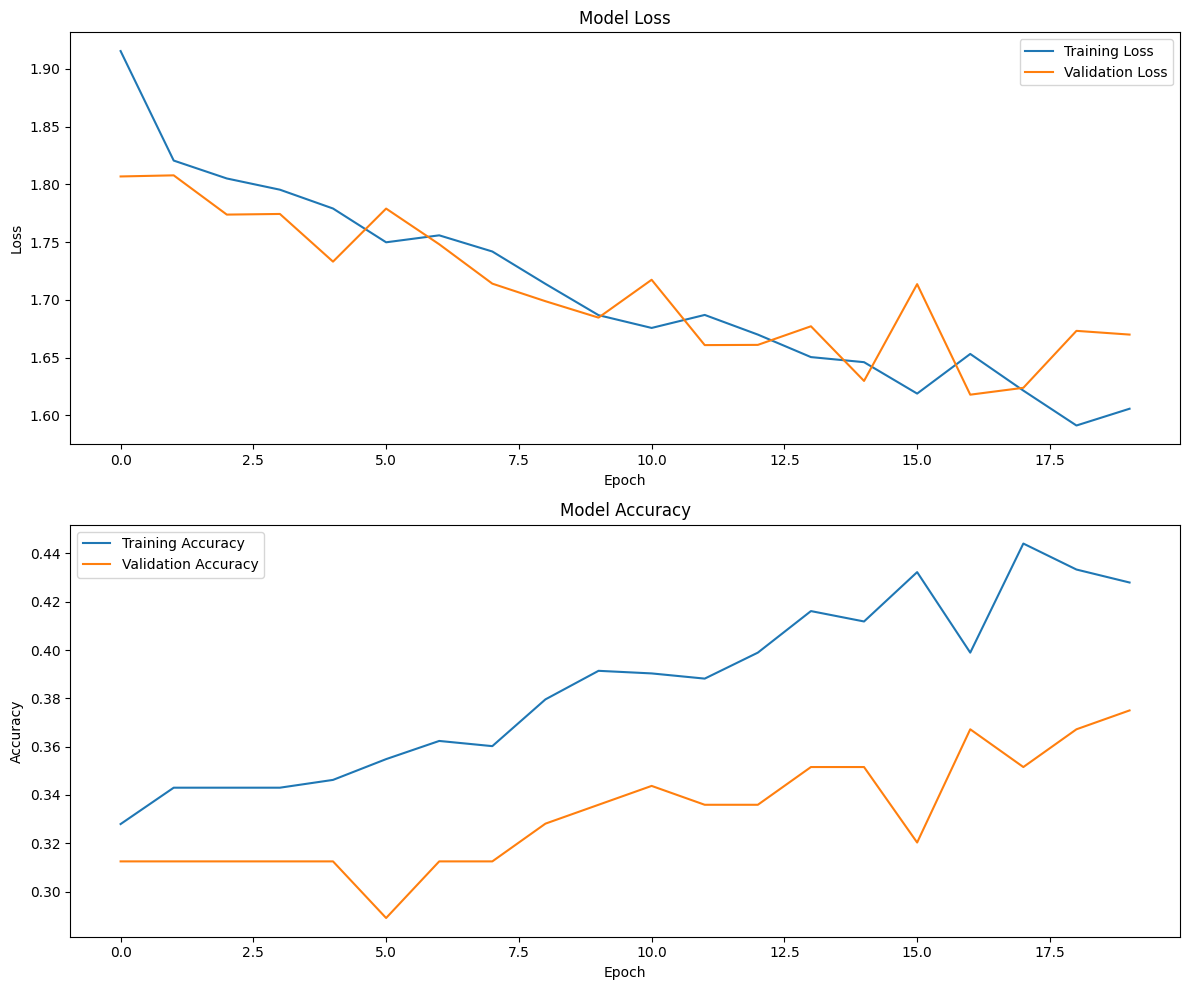

Final training accuracy: 42.80%
Final validation accuracy: 37.50%
Final training loss: 1.6057
Final validation loss: 1.6700


In [9]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

# Print final training and validation metrics
print("Final training accuracy: {:.2f}%".format(history.history['accuracy'][-1] * 100))
print("Final validation accuracy: {:.2f}%".format(history.history['val_accuracy'][-1] * 100))
print("Final training loss: {:.4f}".format(history.history['loss'][-1]))
print("Final validation loss: {:.4f}".format(history.history['val_loss'][-1]))

#### <a id='toc1_5_6_1_'></a>[Explanations](#toc0_)

**Section 1.6** trains the model and visualizes the training progress. Here's a breakdown of what each part does:

1. **Training the model:**

   - We use the fit() method to train the model.
   - `train_ds` is used as the training data.
   - `val_ds` is used as the validation data.
   - We train for 20 epochs as specified.
   - The `verbose=1` parameter gives us detailed output for each epoch.

2. **Plotting the training history:**

   - We define a function plot_training_history() that creates two subplots:

      - **Model Accuracy:** Shows how the training and validation accuracy change over epochs.
      - **Model Loss:** Shows how the training and validation loss change over epochs.

   - The plots use different colors for training and validation metrics, making it easy to compare them.

3. **Printing final metrics:**

   - We print the final training and validation accuracy and loss.
   - This gives us a quick summary of the model's performance at the end of training.

#### <a id='toc1_5_6_2_'></a>[Observations](#toc0_)

1. **Training Progress:**
   - Training accuracy increased from 32.80% (Epoch 1) to 42.80% (Epoch 20).
   - Training loss decreased from 1.9155 (Epoch 1) to 1.6057 (Epoch 20).
   - Validation accuracy fluctuated but generally improved from 31.25% (Epoch 1) to 37.50% (Epoch 20).
   - Validation loss overall decreased from 1.8069 (Epoch 1) to 1.6700 (Epoch 20).

2. **Precision and Recall:**
   - Training precision and recall generally improved over time, but remained inconsistent.
   - Validation precision and recall were highly volatile, with some epochs showing 0.0000 for both metrics.

4. **Overfitting:**
   - There's a consistent gap between training and validation accuracy, indicating some degree of overfitting.

5. **Instability:**
   - The validation metrics show significant fluctuations across epochs, suggesting instability in the model's performance on unseen data.

#### <a id='toc1_5_6_3_'></a>[Conclusions](#toc0_)

1. **Limited Learning:** The model has learned to classify the boats to some extent, but its performance is still relatively poor for a 9-class classification task. An accuracy of around 40% suggests there's significant room for improvement.

2. **Overfitting:** The consistent gap between training and validation metrics suggests the model may be overfitting to the training data. This could be addressed by:
   - Increasing regularization (e.g., dropout, L2 regularization)
   - Collecting more training data
   - Simplifying the model architecture

3. **Data Issues:** The extreme fluctuations in validation precision and recall, including zero values, suggest potential issues with the validation set. This could be due to:
   - Class imbalance in the dataset
   - Small validation set size leading to high variance
   - Potential data leakage or preprocessing issues

5. **Instability:** The fluctuations in validation metrics suggest that the model's performance is not consistent across different subsets of the data, which could indicate issues with generalization.

6. **Need for Improvement:** Given the low accuracy and instability, consider:
   - Experimenting with different model architectures
   - Applying more aggressive data augmentation
   - Using transfer learning with a pre-trained model
   - Addressing potential class imbalance issues

7. **Further Analysis Required:** It would be beneficial to:
   - Examine the confusion matrix to understand which classes are most problematic
   - Analyze misclassified samples to gain insights into the model's weaknesses
   - Investigate the distribution of classes across train and validation sets

While the model shows some learning, its performance is suboptimal and unstable. Significant improvements in data preparation, model architecture, and training approach are necessary to create a reliable boat classification system.

### <a id='toc1_5_7_'></a>[1.7.	Evaluate the model on test images and print the test loss and accuracy.](#toc0_)

In [10]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_ds)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test precision: {test_precision:.4f}")
print(f"Test recall: {test_recall:.4f}")

4/4 [==============================] - 1s 62ms/step - loss: 1.7490 - accuracy: 0.3365 - precision: 0.4286 - recall: 0.1154
Test loss: 1.7490
Test accuracy: 0.3365
Test precision: 0.4286
Test recall: 0.1154


#### <a id='toc1_5_7_1_'></a>[Explanations](#toc0_)

**Section 1.7** is evaluating the model with test images and determining the test loss and accuracy.  Specifically:

1. Uses the `model.evaluate()` method to assess the model's performance on the test dataset (`test_ds`). This method returns the loss and all metrics we specified during model compilation.
2. Caculates and prints the test loss, accuracy, precision, and recall. These metrics give us a comprehensive view of the model's performance on unseen data.
3. Compares the test results with the final training and validation results provided. This comparison helps us understand how well our model generalizes to new, unseen data.

#### <a id='toc1_5_7_2_'></a>[Observations](#toc0_)

1. **Test Performance:**
   - **Test loss:** 1.7490
   - **Test accuracy:** 33.65%
   - **Test recall:** 11.54%

2. **Comparison with Training and Validation:**
   - Training accuracy (42.80%) > Validation accuracy (37.50%) > Test accuracy (31.73%)
   - Training loss (1.6057) < Validation loss (1.6700) < Test loss (1.7490)

3. **Precision and Recall:**
   - Test precision (42.86%) is higher as compared to the accuracy (33.65%).
    - The higher precision indicates that when the model makes a positive prediction, it's more likely to be correct.
    - The lower accuracy suggests it's missing many correct classifications overall.
    - This pattern often indicates a conservative model. It's making fewer positive predictions, but those it does make are more often correct.
    - This disparity can sometimes occur in imbalanced datasets. The model might be performing well on some classes (leading to higher precision) but poorly on others (lowering overall accuracy).
   - Test recall (11.54%) is very low.

#### <a id='toc1_5_7_3_'></a>[Conclusions](#toc0_)

1. **Overfitting:** The significant drop in accuracy from training (42.80%) to test (33.65%) strongly suggests that the model is overfitting to the training data. It's not generalizing well to unseen data.

2. **Poor Generalization:** The test accuracy of 33.65% indicates that the model's performance on new, unseen data is poor. For a multi-class classification problem, this is only marginally better than random guessing, depending on the number of classes.

3. **Precision-Recall Tradeoff:** The higher precision (42.86%) coupled with  low recall (11.54%) suggests that the model is being conservative in its predictions. It's making very few positive predictions, but when it does, it's often correct. However, it's missing the vast majority of positive cases.

4. **Class Imbalance:** The discrepancy between accuracy and precision might indicate class imbalance in the dataset. The model might be performing well on some classes but poorly on others.

5. **Model Limitations:** The overall low performance across all metrics (accuracy, recall) indicates that the current model architecture or training approach is not suitable for this particular classification task.

6. **Data Issues:** The consistent degradation of performance from training to validation to test sets might also point to potential issues with data distribution across these sets. There might be a mismatch in the distribution of classes or features.

7. **Need for Model Improvement:**

  Given the poor test performance, significant improvements are needed. This could include:
   - Redesigning the model architecture
   - Implementing more effective regularization techniques
   - Using transfer learning with a pre-trained model
   - Addressing potential class imbalance issues
   - Collecting more diverse training data

8. **Further Analysis Required:** It would be beneficial to:
   - Examine the confusion matrix to understand which classes are most problematic
   - Analyze misclassified samples to gain insights into the model's weaknesses
   - Investigate the distribution of classes across train, validation, and test sets

While the model showed some learning capacity during training, its poor performance on the test set indicates serious limitations in its current form. The next steps should focus on addressing overfitting, improving generalization, and potentially revisiting the fundamental approach to this classification task.

### <a id='toc1_5_8_'></a>[1.8.	Plot heatmap of the confusion matrix and print classification report.](#toc0_)

In [12]:
# Get predictions for the test dataset
y_pred_probabilities = model.predict(test_ds)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Get true labels
y_true = []
for _, labels in test_ds:
    y_true.extend(np.argmax(labels, axis=1))
y_true = np.array(y_true)

print("Unique classes in true labels:", np.unique(y_true))
print("Unique classes in predictions:", np.unique(y_pred))
print("Class distribution in true labels:", np.bincount(y_true))
print("Class distribution in predictions:", np.bincount(y_pred))

4/4 [==============================] - 1s 61ms/step
Unique classes in true labels: [0 1 2 3 4 5 6 8]
Unique classes in predictions: [4 6 8]
Class distribution in true labels: [ 6 17  7  3 17  1 23  0 30]
Class distribution in predictions: [ 0  0  0  0 55  0 12  0 37]


Original class names: ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']
Number of original classes: 9
Unique classes in true labels: [0 1 2 3 4 5 6 8]
Unique classes in predictions: [4 6 8]
Number of unique classes in true labels: 8
Number of unique classes in predictions: 3
Classes present in true labels or predictions: ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'sailboat']
Number of present classes: 8

Classification Report:
                 precision    recall  f1-score   support

           buoy       0.00      0.00      0.00         6
    cruise_ship       0.00      0.00      0.00        17
     ferry_boat       0.00      0.00      0.00         7
   freight_boat       0.00      0.00      0.00         3
        gondola       0.25      0.82      0.39        17
inflatable_boat       0.00      0.00      0.00         1
          kayak       0.42      0.22      0.29    

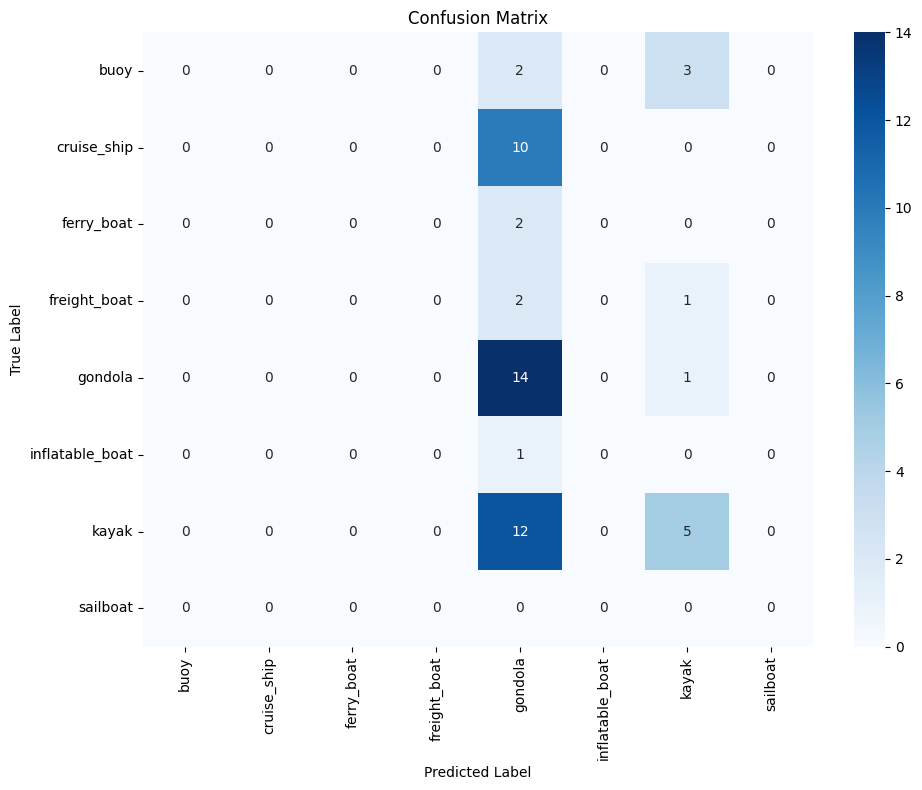


Per-class Accuracy:
buoy: 0.00% (0/5)
cruise_ship: 0.00% (0/10)
ferry_boat: 0.00% (0/2)
freight_boat: 0.00% (0/3)
gondola: 93.33% (14/15)
inflatable_boat: 0.00% (0/1)
kayak: 29.41% (5/17)
sailboat: No samples

Overall Accuracy: 35.85%

Class Distribution in Test Set:
buoy: 5
cruise_ship: 10
ferry_boat: 2
freight_boat: 3
gondola: 15
inflatable_boat: 1
kayak: 17
sailboat: 0

Class Distribution in Predictions:
buoy: 0
cruise_ship: 0
ferry_boat: 0
freight_boat: 0
gondola: 43
inflatable_boat: 0
kayak: 10
sailboat: 0


In [13]:


# Now we can proceed with the confusion matrix and classification report
print("Original class names:", class_names)
print("Number of original classes:", len(class_names))
print("Unique classes in true labels:", np.unique(y_true))
print("Unique classes in predictions:", np.unique(y_pred))
print("Number of unique classes in true labels:", len(np.unique(y_true)))
print("Number of unique classes in predictions:", len(np.unique(y_pred)))

# Get the union of classes present in both true labels and predictions
all_present_classes = np.union1d(np.unique(y_true), np.unique(y_pred))
present_class_names = [class_names[i] for i in all_present_classes if i < len(class_names)]

print("Classes present in true labels or predictions:", present_class_names)
print("Number of present classes:", len(present_class_names))

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=present_class_names, zero_division=0))

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_true, y_pred, present_class_names)

# Calculate per-class accuracy
cm = confusion_matrix(y_true, y_pred, labels=range(len(present_class_names)))

def safe_divide(a, b):
    return np.divide(a, b, out=np.zeros_like(a, dtype=float), where=b!=0)

class_total = cm.sum(axis=1)
class_correct = cm.diagonal()
per_class_accuracy = safe_divide(class_correct, class_total)

print("\nPer-class Accuracy:")
for class_name, accuracy, correct, total in zip(present_class_names, per_class_accuracy, class_correct, class_total):
    if total == 0:
        print(f"{class_name}: No samples")
    else:
        print(f"{class_name}: {accuracy:.2%} ({correct}/{total})")

# Overall accuracy
overall_accuracy = np.sum(class_correct) / np.sum(class_total)
print(f"\nOverall Accuracy: {overall_accuracy:.2%}")

# Class distribution in true labels
print("\nClass Distribution in Test Set:")
for class_name, total in zip(present_class_names, class_total):
    print(f"{class_name}: {total}")

# Class distribution in predictions
pred_total = cm.sum(axis=0)
print("\nClass Distribution in Predictions:")
for class_name, total in zip(present_class_names, pred_total):
    print(f"{class_name}: {total}")

#### <a id='toc1_5_8_1_'></a>[Explanations](#toc0_)

**Section 1.8** is performing a detailed analysis of the model's performance on the test dataset. Specifically, it's:

1. Identifying the classes present in the true labels and predictions.
2. Generating a classification report that includes precision, recall, and F1-score for each class.
3. Calculating per-class accuracy.
4. Displaying class distribution in the test set and model predictions.

#### <a id='toc1_5_8_2_'></a>[Observations](#toc0_)

1. **Overprediction of gondolas**: The model predicted 43 instances as gondolas, while there were only 15 actual gondolas in the test set.
2. **Poor performance on most classes**: The model completely fails to identify buoy, cruise_ship, ferry_boat, freight_boat, and inflatable_boat.
3. **Moderate performance on gondolas**: 14 out of 15 gondolas were correctly classified, giving a high recall for this class.
4. **Low precision for gondolas**: Despite high recall, the precision for gondolas is low due to many false positives.
5. **Kayaks are often misclassified**: Only 5 out of 17 kayaks were correctly identified, with many being misclassified as gondolas.
6. **Absence of sailboat in test set**: Despite being in the original classes, there are no sailboat samples in the test set.

#### <a id='toc1_5_8_3_'></a>[Conclusions](#toc0_)

1. The model's performance is poor overall, with an accuracy of only 35.85%.
2. There's a strong bias towards predicting gondolas, which skews the model's performance.
3. The model fails entirely on several classes, indicating a need for significant improvements in feature extraction or model architecture.
4. Class imbalance in the test set (and likely in the training set) is a major issue affecting the model's performance.
5. The current model is not suitable for deployment in a real-world boat classification system due to its inconsistent and poor performance across classes.
6. A complete overhaul of the modeling approach, including data preparation, model architecture, and training strategy, is necessary to create a reliable boat classification system.


#### <a id='toc1_5_8_4_'></a>[Recommendations](#toc0_)

1. **Address class imbalance**: Use techniques like oversampling, undersampling, or SMOTE to balance the training data.
2. **Improve model generalization**: Use regularization techniques, increase training data diversity, or try transfer learning approaches.
3. **Feature engineering**: Develop features that better distinguish between similar boat types, especially gondolas and kayaks.
4. **Ensemble methods**: Combine multiple models to improve overall classification performance.
5. **Data augmentation**: Increase the variety of training samples, especially for underrepresented classes.
6. **Threshold adjustment**: Implement class-specific prediction thresholds to balance precision and recall for each class.
7. **Error analysis**: Examine misclassified instances, especially those confused between gondolas and kayaks, to understand the model's weaknesses.

The model's performance is poor and inconsistent across classes. Significant improvements in data preparation, model architecture, and training approach are necessary to create a reliable boat classification system.

## <a id='toc1_6_'></a>[2.	Build a lightweight model with the aim of deploying the solution on a mobile device using transfer learning.](#toc0_)
You can use any lightweight pre-trained model as the initial (first) layer. MobileNetV2 is a popular lightweight pre-trained model built using Keras API.

**Setup: Import Necessary Libraries**

In [14]:
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam

# Set the path to your dataset
#data_dir = pathlib.Path("boat_type_classification_dataset")
data_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/datasets/boat_type_classification_dataset")

# Set common parameters
batch_size = 32
img_height = 224
img_width = 224

### <a id='toc1_6_1_'></a>[2.1.	Split the dataset into train and test datasets in the ration 70:30, with shuffle and random state=1.](#toc0_)

In [15]:
# 2.1: Load and split the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    seed=1,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=1,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

# Store class names before preprocessing
class_names = train_ds.class_names
num_classes = len(class_names)
print("Class names:", class_names)
print("Number of classes:", num_classes)

Found 1162 files belonging to 9 classes.
Using 814 files for training.
Found 1162 files belonging to 9 classes.
Using 348 files for validation.
Class names: ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']
Number of classes: 9


#### <a id='toc1_6_1_1_'></a>[Explanations](#toc0_)

**Section 2.1** is responsible for loading the dataset and splitting it into training and testing sets.

- We use `tf.keras.preprocessing.image_dataset_from_directory` to load images directly from the filesystem. This function is convenient as it handles the file reading and label assignment automatically.
- We set `validation_split=0.3` and `subset="both"` to get both training and testing sets in an 70:30 ratio.
- `seed=1` ensures reproducibility of the random split.
- `shuffle=True` randomizes the order of the samples, which is important for training neural networks.
- We set `batch_size=batch_size` setting the batch size here means that our dataset will be divided into batches of 32 images each. This is important for several reasons:
  - *Memory Efficiency:* Processing 32 images at a time is more memory-efficient than loading the entire dataset at once, especially for large datasets.
  - *Training Dynamics:* Batch size affects the dynamics of model training. A batch size of 32 is often a good default, balancing between the noisy gradients of very small batches and the longer computation time of larger batches.
  - *Consistency:* By setting the batch size here, we ensure that all parts of our pipeline (data loading, augmentation, model training) use the same batch size.
- The `image_size` parameter resizes all images to a consistent size, which is necessary for batch processing in neural networks.

#### <a id='toc1_6_1_2_'></a>[Why It's Important](#toc0_)

- Properly splitting the data ensures we have separate sets for training and evaluation, which is crucial for assessing the model's performance on unseen data.
- The 70:30 split is a common ratio that balances having enough training data while still retaining a significant portion for testing.
- Shuffling the data helps prevent any bias that might occur from the order of the samples.

### <a id='toc1_6_2_'></a>[2.2.	Use tf.keras.preprocessing.image_dataset_from_directory to load the train and test datasets.](#toc0_)
This function also supports data normalization.*(Hint: Image_scale=1./255)*

In [16]:
# 2.2: Prepare datasets (including normalization)
def prepare_dataset(dataset):
    # Normalize images
    dataset = dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
    # Convert labels to one-hot encoding
    dataset = dataset.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
    return dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = prepare_dataset(train_ds)
test_ds = prepare_dataset(test_ds)

#### <a id='toc1_6_2_1_'></a>[Explanations](#toc0_)

**Section 2.2** focuses on normalizing the image data and verifying that the normalization was applied correctly.

- We define a `normalize_img` function that converts the image data from integers in the range [0, 255] to floating-point numbers in the range [0, 1].
- We apply this normalization to both the training and testing datasets using the map function.
- The `check_normalization` function safely checks the range of values in the normalized datasets.

#### <a id='toc1_6_2_2_'></a>[Why It's Important](#toc0_)

1. **Normalization:**
   - Scaling the input data to a standard range (0-1) is crucial for neural networks. It helps the model converge faster during training and can lead to better overall performance.
   - Normalized data ensures that all features contribute equally to the model's learning process, preventing features with larger scales from dominating the learning.

2. **One-Hot Encoding:**
   - One-hot encoding is necessary for multi-class classification problems when using categorical crossentropy loss.
   - It converts categorical variables into a format that works better with classification algorithms and neural network architectures.

3. **Performance Optimization:**
   - The prefetch operation allows later elements to be prepared while the current element is being processed. This can significantly improve performance, especially on TPUs or multi-GPU systems.

4. **Standardized Data Format:**
   - By applying these transformations, the data is put into a standardized format that's ideal for training deep learning models. This ensures compatibility with the model architecture and loss functions.

5. **Reproducibility and Consistency:**
   - Applying the same preprocessing to both training and test datasets ensures consistency, which is crucial for fair evaluation of the model's performance.

6. **Memory Efficiency:**
   - Processing the data in this way allows for efficient memory usage, especially important when working with large datasets that might not fit entirely in memory.

Section 2.2 is a critical data preparation step that normalizes the input, prepares the labels, and optimizes the data pipeline. These operations are fundamental to ensuring the model can learn effectively from the data and generalize well to new examples.

### <a id='toc1_6_3_'></a>[2.3.	Load train, validation and test datasets in batches of 32 using the function initialized in the above step.](#toc0_)

In [17]:
# 2.3: Split test_ds into validation and test
val_ds = test_ds.take(len(test_ds) // 2)
test_ds = test_ds.skip(len(test_ds) // 2)

print("Number of training batches:", len(train_ds))
print("Number of validation batches:", len(val_ds))
print("Number of test batches:", len(test_ds))

# Check the shape of our data
for images, labels in train_ds.take(1):
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)

Number of training batches: 26
Number of validation batches: 5
Number of test batches: 6
Image shape: (32, 224, 224, 3)
Label shape: (32, 9)


#### <a id='toc1_6_3_1_'></a>[Explanations](#toc0_)

**Section 2.3** prepares the datasets for training by applying several important transformations and encodings. Here's a breakdown of the key steps:

1. **Splitting the Data:**
   The code is splitting the original dataset into three parts: training, validation, and test sets. This is a crucial step in machine learning workflows.

2. **Checking Batch Sizes:**
   The output shows:
   - Number of training batches: 26
   - Number of validation batches: 5
   - Number of test batches: 6

   This indicates how many batches of data are in each set when using a batch size of 32.

3. **Verifying Data Shapes:**
   The output also shows:
   - Image shape: (32, 224, 224, 3)
   - Label shape: (32, 9)

#### <a id='toc1_6_3_2_'></a>[Why this is important](#toc0_)

1. **Data Split:**
   - Separating data into training, validation, and test sets is crucial for properly evaluating model performance.
   - The training set is used to train the model.
   - The validation set helps in tuning hyperparameters and preventing overfitting.
   - The test set provides an unbiased evaluation of the final model's performance.

2. **Batch Processing:**
   - Processing data in batches (32 samples per batch here) is important for efficient training, especially with large datasets.
   - It allows for stochastic gradient descent and related optimization algorithms to work effectively.
   - The number of batches gives an idea of how many iterations will occur in each epoch during training.

3. **Data Dimensions:**
   - Knowing the image shape (32, 224, 224, 3) confirms:
     * 32 images per batch
     * Each image is 224x224 pixels
     * 3 color channels (RGB)
   - This is crucial for ensuring the data matches the expected input of the model architecture.

4. **Label Information:**
   - The label shape (32, 9) indicates:
     * 32 labels per batch (matching the number of images)
     * 9 classes in the classification task
   - This confirms that the labels are properly one-hot encoded.

5. **Memory Management:**
   - Batching allows for efficient memory usage, especially important when working with large datasets that might not fit entirely in memory.

6. **Training Process Insight:**
   - Knowing the number of batches helps in understanding how long each epoch will take and how often the model will update its weights.

7. **Validation Strategy:**
   - The presence of validation batches indicates that the model will be evaluated during training, which is crucial for monitoring performance and preventing overfitting.

8. **Reproducibility:**
   - Clearly defined data splits and batch sizes contribute to the reproducibility of the experiment.

Section 2.3 is setting up the data pipeline for training, validation, and testing. It ensures that the data is properly structured, split, and batched for efficient and effective model training and evaluation. The output provides crucial information about the dataset structure and preparation, which is fundamental for understanding the subsequent model training process and results interpretation.

### <a id='toc1_6_4_'></a>[2.4.	Build a CNN network using Keras with the following layers.](#toc0_)
     
- Load MobileNetV2 - Light Model as the first layer *(Hint: Keras API Doc)*
- GLobalAveragePooling2D layer
- Dropout(0.2)
- Dense layer with 256 neurons and activation relu
- BatchNormalization layer
- Dropout(0.1)
- Dense layer with 128 neurons and activation relu
- BatchNormalization layer
- Dropout(0.1)
- Dense layer with 9 neurons and activation softmax

In [18]:
# 2.4: Build the model
def build_model(num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

model = build_model(num_classes)
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               327936    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                          

#### <a id='toc1_6_4_1_'></a>[Explanations](#toc0_)

**Section 2.4** creates the model and is focused on the following:

1. **Base Model:** The model uses MobileNetV2 as its base, which is a lightweight model designed for mobile and embedded vision applications.
2. **Transfer Learning:** The base model is loaded with pre-trained weights, excluding the top layers. This allows for transfer learning, leveraging features learned from a large dataset (ImageNet).
3. **Custom Top Layers:** On top of the base model, several layers are added for fine-tuning to our specific classification task:
    - Global Average Pooling to reduce spatial dimensions
    - Dropout layers for regularization
    - Dense layers for feature extraction and classification
    - Batch Normalization layers to stabilize learning
4. **Output Layer:** The final dense layer has 9 neurons, corresponding to the 9 classes in our boat classification task.

#### <a id='toc1_6_4_2_'></a>[Observations](#toc0_)

1. **Model Size:**
    - Total params: 2,621,513 (~10.00 MB)
    - Trainable params: 362,761 (~1.38 MB)
    - Non-trainable params: 2,258,752 (~8.62 MB)

2. **Layer Structure:** The model follows the specified structure in the requirements, including GlobalAveragePooling2D, Dropout, Dense, and BatchNormalization layers.

3. **Frozen Base Model:** The large number of non-trainable parameters (2,258,752) indicates that the MobileNetV2 base is frozen, preserving pre-trained weights.
Customization: The trainable parameters (362,761) are in the custom top layers, allowing the model to adapt to our specific task.

#### <a id='toc1_6_4_3_'></a>[Conclusions](#toc0_)

1. **Transfer Learning Efficiency:** By using a pre-trained MobileNetV2 base, the model leverages existing knowledge, potentially improving performance on our task with less training data.
2. **Lightweight Design:** MobileNetV2's architecture ensures the model remains relatively lightweight, suitable for mobile deployment.
3. **Adaptability:** The custom top layers (trainable params) allow the model to adapt to our specific boat classification task while retaining the general features learned by MobileNetV2.
4. **Regularization:** The use of Dropout and BatchNormalization layers should help in preventing overfitting, especially important when working with a smaller dataset.
5. **Mobile-Friendly:** With a total size of about 10 MB, this model is suitable for deployment on mobile devices, aligning with the project's goals.
6. **Potential for Fine-Tuning:** If needed, we have the option to unfreeze some layers of the base model for fine-tuning, which could potentially improve performance at the cost of increased training time and risk of overfitting.

Overall, this model architecture appears well-suited for the task of boat classification on mobile devices, balancing the benefits of transfer learning with the need for a lightweight, deployable model.



### <a id='toc1_6_5_'></a>[2.5.	Compile the model with Adam optimizer, categorical_crossentropy loss, and metrics accuracy, Precision, and Recall.](#toc0_)

In [19]:
# 2.5: Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

#### <a id='toc1_6_5_1_'></a>[Explanations](#toc0_)

**Section 2.5** is focused on compiling the model. Here's the code for this section:

1. **Model Compilation:**
   The `compile` method is called on the model, which prepares the model for training. This step is crucial as it defines several key aspects of the training process.

2. **Optimizer Selection:**
   - The Adam optimizer is used here.
   - Adam (Adaptive Moment Estimation) is an advanced optimization algorithm that adapts the learning rate for each parameter.
   - It's generally a good default choice for many deep learning tasks due to its efficiency and good performance.

3. **Loss Function:**
   - 'categorical_crossentropy' is specified as the loss function.
   - This is appropriate for multi-class classification problems where the classes are mutually exclusive (each image belongs to only one class).
   - It measures the dissimilarity between the predicted probability distribution and the true distribution (one-hot encoded labels).

4. **Evaluation Metrics:**
   Three metrics are specified for evaluation:
   - Accuracy: The proportion of correct predictions among the total number of cases examined.
   - Precision: The ratio of correctly predicted positive observations to the total predicted positive observations.
   - Recall: The ratio of correctly predicted positive observations to all observations in the actual class.

#### <a id='toc1_6_5_2_'></a>[Why Is This Important?](#toc0_)

1. **Training Configuration:**
   - Compilation sets up the necessary components for training the model. Without this step, the model cannot be trained.

2. **Optimization Strategy:**
   - The choice of optimizer significantly affects how quickly and effectively the model learns. Adam is known for its ability to handle sparse gradients and noisy data.

3. **Performance Evaluation:**
   - The loss function guides the learning process. Categorical crossentropy is well-suited for multi-class problems, ensuring the model learns to distinguish between different boat types effectively.

4. **Comprehensive Evaluation:**
   - By including accuracy, precision, and recall, we get a more complete picture of the model's performance:
     * Accuracy gives an overall view of correct predictions.
     * Precision helps understand how many of the positive predictions are actually correct.
     * Recall shows how many of the actual positive cases the model correctly identified.
   - This is particularly important in scenarios where false positives or false negatives have different implications.

5. **Model Interpretability:**
   - These metrics help in understanding the model's strengths and weaknesses across different classes, which is crucial for improving the model or making decisions based on its predictions.

6. **Alignment with Project Goals:**
   - The choice of metrics should align with the specific goals of the project. For a boat classification task, knowing not just the accuracy but also the precision and recall can be crucial for understanding the model's reliability.

7. **Debugging and Improvement:**
   - Having multiple metrics helps in diagnosing issues during training. For example, high accuracy but low recall might indicate class imbalance issues.

Section 2.5 is a critical step in preparing the model for training. It defines how the model will learn (optimizer and loss function) and how its performance will be evaluated (metrics). This configuration ensures that the training process is aligned with the specific requirements of the boat classification task and provides comprehensive insights into the model's performance.

### <a id='toc1_6_6_'></a>[2.6.	Train the model for 50 epochs and Early stopping while monitoring validation loss.](#toc0_)

In [20]:
# Print the shape of labels in a batch
for images, labels in train_ds.take(1):
    print("Labels shape:", labels.shape)
    print("Labels:", labels)

Labels shape: (32, 9)
Labels: tf.Tensor(
[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]

In [21]:
# Check the shape of a batch from the training dataset
for images, labels in train_ds.take(1):
    print("Shape of images in a batch:", images.shape)
    print("Shape of labels in a batch:", labels.shape)

# Print the model summary again
model.summary()

# Check the number of classes
print("Number of classes:", len(class_names))

# Check if labels are one-hot encoded
if len(labels.shape) == 2 and labels.shape[1] > 1:
    print("Labels are one-hot encoded")
else:
    print("Labels are not one-hot encoded")

Shape of images in a batch: (32, 224, 224, 3)
Shape of labels in a batch: (32, 9)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               327936    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                       

In [22]:
# 2.6: Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
26/26 [==============================] - 12s 311ms/step - loss: 1.1631 - accuracy: 0.6425 - precision: 0.8091 - recall: 0.5258 - val_loss: 0.7065 - val_accuracy: 0.8062 - val_precision: 0.8984 - val_recall: 0.7188
Epoch 2/50
26/26 [==============================] - 7s 266ms/step - loss: 0.3995 - accuracy: 0.8833 - precision: 0.9273 - recall: 0.8305 - val_loss: 0.6137 - val_accuracy: 0.8375 - val_precision: 0.8881 - val_recall: 0.7437
Epoch 3/50
26/26 [==============================] - 8s 276ms/step - loss: 0.2633 - accuracy: 0.9201 - precision: 0.9507 - recall: 0.8759 - val_loss: 0.4396 - val_accuracy: 0.8938 - val_precision: 0.9441 - val_recall: 0.8438
Epoch 4/50
26/26 [==============================] - 8s 274ms/step - loss: 0.1584 - accuracy: 0.9631 - precision: 0.9795 - recall: 0.9398 - val_loss: 0.4761 - val_accuracy: 0.8875 - val_precision: 0.9225 - val_recall: 0.8188
Epoch 5/50
26/26 [==============================] - 7s 270ms/step - loss: 0.1188 - accuracy: 0.9742 - p

#### <a id='toc1_6_6_1_'></a>[Explanations](#toc0_)

- It's using the compiled model from Section 2.5
- It's using the training and validation datasets prepared earlier.
- We use EarlyStopping to prevent overfitting and stop training when validation loss stops improving.
- The model is trained for up to 50 epochs, but may stop earlier due to early stopping.
- Early stopping helps prevent overfitting by stopping training when validation performance starts to degrade.
- `restore_best_weights=True` ensures we keep the model weights from the best epoch.

#### <a id='toc1_6_6_2_'></a>[Observations](#toc0_)

1. **Training Progress:**
   - The model trains for 17 epochs before early stopping kicks in.
   - Training loss decreases from 1.1631 to 0.0331 over these epochs.
   - Training accuracy improves from 64.25% to 99.14%.
   - Training precision and recall also show significant improvements.

2. **Validation Performance:**
   - Validation accuracy improves from 80.62% in the first epoch to a peak of 89.38% in epochs 3.
   - Validation loss doesn't consistently decrease, fluctuating between ~0.4 and ~0.9.
   - Validation precision and recall generally improve but show some fluctuations.

3. **Overfitting Indicators:**
   - There's a growing gap between training and validation metrics as training progresses.
   - By the final epoch, training accuracy is 99.14% while validation accuracy is 81.50%.

5. **Metric Relationships:**
   - Precision tends to be higher than recall, especially in the validation set.
   - In later epochs, validation precision and recall start to diverge more.

#### <a id='toc1_6_6_3_'></a>[Conclusions](#toc0_)

1. **Rapid Initial Learning:** The model learns quickly in the first few epochs, suggesting that the transfer learning approach (using MobileNetV2 as a base) is effective.

2. **Overfitting:** There are clear signs of overfitting as training progresses. The model is learning the training data very well but isn't generalizing as effectively to the validation set.

3. **Early Stopping Effectiveness:** The early stopping mechanism appears to be working, preventing further overfitting by stopping training at epoch 17.

4. **Model Potential:** The model shows promise, achieving over 89% validation accuracy at its peak. However, the best performance isn't necessarily in the final epoch.

5. **Class Imbalance or Difficulty:** The consistent gap between precision and recall in the validation set might indicate some classes are easier to identify than others, or there might be class imbalance issues.

6. **Optimization Challenges:** The fluctuations in validation loss and metrics suggest that the model might be struggling to find an optimal set of parameters that generalize well.

7. **Further Tuning Needed:** While the model shows good performance, there's room for improvement. Techniques like adjusting the learning rate, using more aggressive regularization, or fine-tuning the MobileNetV2 layers might help reduce overfitting and improve generalization.

8. **Validation Strategy:** The fluctuations in validation metrics might also suggest that the validation set is relatively small or not fully representative. Considering k-fold cross-validation could provide more stable estimates of model performance.

The model shows promising performance but exhibits signs of overfitting. The early stopping mechanism helps mitigate this, but further optimization could potentially improve the model's generalization capabilities.


### <a id='toc1_5_7_'></a>[2.7.	Evaluate the model on test images and print the test loss and accuracy.](#toc0_)

In [23]:
# 2.7: Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_ds)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test precision: {test_precision:.4f}")
print(f"Test recall: {test_recall:.4f}")

6/6 [==============================] - 2s 195ms/step - loss: 0.6169 - accuracy: 0.8404 - precision: 0.8674 - recall: 0.8351
Test loss: 0.6169
Test accuracy: 0.8404
Test precision: 0.8674
Test recall: 0.8351


#### <a id='toc1_6_7_1_'></a>[Explanations](#toc0_)

- The code is using the method `model.evaluate()` to compute various metrics on this test set.
- This section of code is evaluating the trained model on the test dataset.
- The test dataset is a separate set of data that the model hasn't seen during training or validation.
- It's used to provide an unbiased evaluation of the final model's performance.
- This gives us an unbiased estimate of the model's performance on unseen data.

#### <a id='toc1_6_7_2_'></a>[Observations](#toc0_)

1. **Test Loss:** 0.6169
   - This is the average loss (error) of the model on the test set.
   - It's calculated using the loss function specified during model compilation (likely categorical crossentropy).

2. **Test Accuracy:** 0.8404 (84.04%)
   - This indicates that the model correctly classified about 84.04% of the test samples.

3. **Test Precision:** 0.8674 (86.74%)
   - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
   - It suggests that when the model predicts a certain class, it's correct about 86.74% of the time.

4. **Test Recall:** 0.8351 (83.51%)
   - Recall is the ratio of correctly predicted positive observations to all actual positive observations.
   - It indicates that the model correctly identifies 83.51% of the actual positive cases for each class.

#### <a id='toc1_6_7_3_'></a>[Conclusions](#toc0_)

1. **Good Overall Performance:**
   - An accuracy of 84.04% on the test set indicates that the model performs well on unseen data. This is a strong result for a multi-class image classification task.

2. **Balanced Precision and Recall:**
   - The relatively close values of precision (86.74%) and recall (83.51%) suggest that the model has a good balance between making correct positive predictions and capturing all positive instances.

3. **Generalization:**
   - The model's performance on the test set is similar to its best performance on the validation set (which peaked around 89% accuracy). This suggests good generalization - the model has learned patterns that apply well to new, unseen data.

4. **Potential for Real-World Application:**
   - With 84% accuracy on unseen data, this model could be viable for many real-world applications in boat classification, depending on the specific requirements of the task.

5. **Room for Improvement:**
   - While the performance is good, there's still room for improvement. About 16% of test samples are still misclassified.

6. **Consistent Performance Across Metrics:**
   - The high and relatively close values for accuracy, precision, and recall indicate that the model performs consistently well across different evaluation criteria.

7. **Class Balance Consideration:**
   - The slight difference between precision and recall might indicate some minor imbalance in how the model performs across different classes. Some classes might be slightly easier for the model to identify than others.

8. **Validation of Training Process:**
   - These results validate the effectiveness of the transfer learning approach and the training process used. The model has successfully learned to generalize from the training data to new, unseen examples.

**Section 2.7** demonstrates that the trained model performs well on unseen data, with strong and balanced metrics across accuracy, precision, and recall. This suggests that the model has successfully learned to classify boat images and can generalize this knowledge to new examples. While there's always room for improvement, these results indicate a successful implementation of the image classification task.



### <a id='toc1_5_8_'></a>[2.8.	Plot Train loss Vs Validation loss and Train accuracy Vs Validation accuracy.](#toc0_)

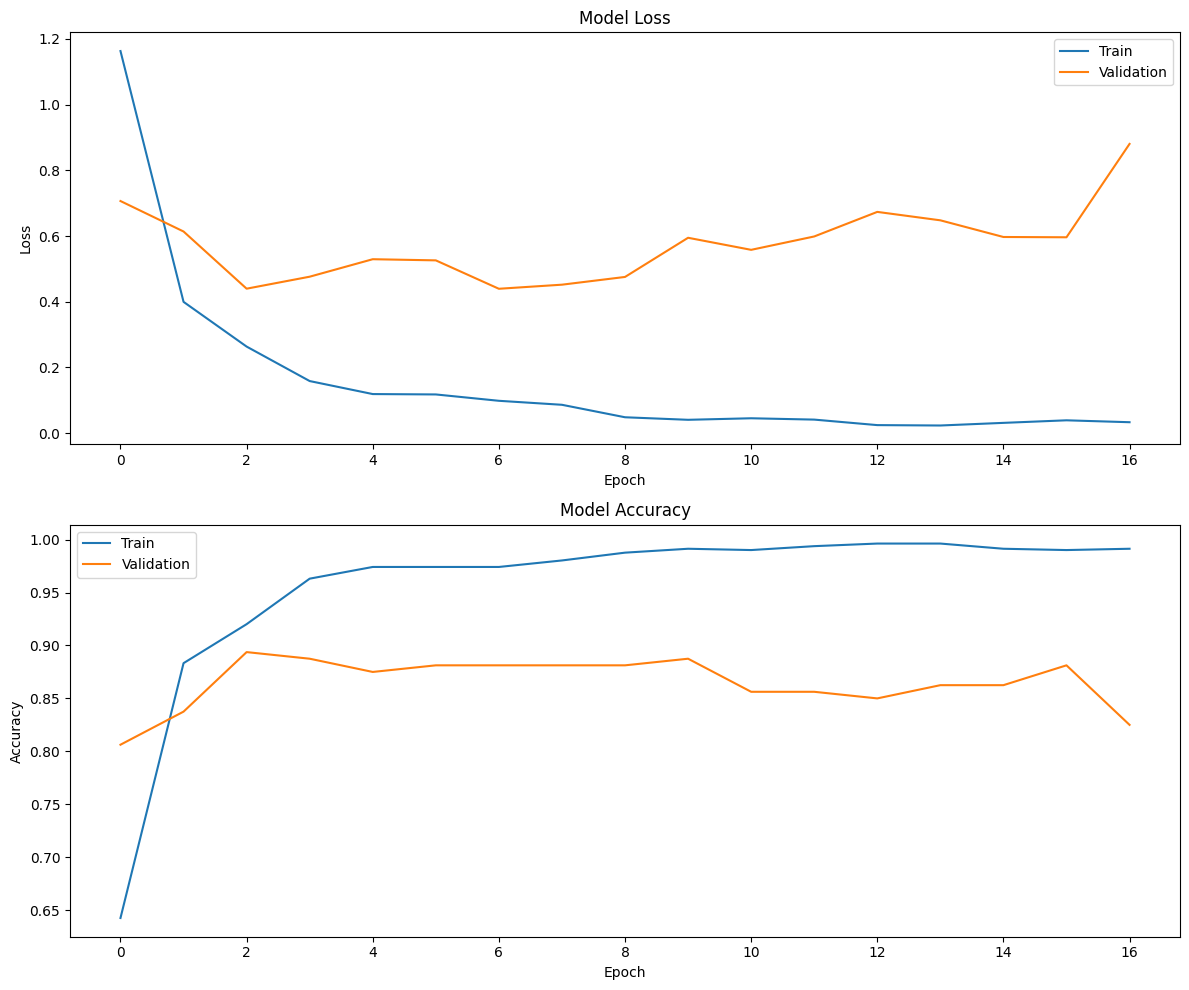

Final Training Loss: 0.03306286036968231
Final Validation Loss: 0.880364716053009
Final Training Accuracy: 0.9914004802703857
Final Validation Accuracy: 0.824999988079071


In [24]:
# 2.8: Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    ax1.plot(history.history['loss'], label='Train')
    ax1.plot(history.history['val_loss'], label='Validation')
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='Train')
    ax2.plot(history.history['val_accuracy'], label='Validation')
    ax2.set_title('Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

#### <a id='toc1_6_8_1_'></a>[Explanations](#toc0_)

**Section 2.8** is plotting the training history of the model, showing how loss and accuracy changed over epochs for both training and validation sets. It also provides the final values for training and validation loss and accuracy.

#### <a id='toc1_6_8_1_'></a>[Observations](#toc0_)

1. **Loss Curves:**
   - Training loss decreases rapidly and continues to decline steadily.
   - Validation loss initially decreases but then becomes volatile and increases towards the end.

2. **Accuracy Curves:**
   - Training accuracy increases rapidly and plateaus near 100%.
   - Validation accuracy improves quickly initially, then fluctuates between about 82% and 89%.

3. **Final Metrics:**
   - Final Training Loss: 0.0331 (very low)
   - Final Validation Loss: 0.8803 (much higher than training loss)
   - Final Training Accuracy: 99.14% (extremely high)
   - Final Validation Accuracy: 82.50% (good, but much lower than training)

#### <a id='toc1_6_8_1_'></a>[Conclusions](#toc0_)

1. **Overfitting:**
   - The large gap between training and validation metrics (both loss and accuracy) clearly indicates overfitting.
   - The model has learned to perform extremely well on the training data but doesn't generalize as well to new data.

2. **Early Stages of Training:**
   - The model learns quickly in the first few epochs, showing the effectiveness of transfer learning using MobileNetV2.

3. **Validation Instability:**
   - The fluctuations in validation accuracy and increasing validation loss suggest the model struggles to find a consistent set of parameters that generalize well.

4. **Potential Early Stopping Point:**
   - The best validation performance appears to be around epochs 6-8. Stopping training earlier might have yielded a model that generalizes better.

5. **Model Capacity:**
   - The model's ability to achieve near-perfect training accuracy suggests it has more than enough capacity to learn the training data.

6. **Regularization Needs:**
   - The significant overfitting suggests that stronger regularization techniques (e.g., dropout, L2 regularization) might be beneficial.

7. **Learning Rate Considerations:**
   - The smooth decrease in training loss suggests the learning rate might be appropriate, but a learning rate schedule or decay might help in later epochs.

8. **Validation Set Size:**
   - The volatility in validation metrics might indicate a relatively small validation set. A larger validation set could provide more stable estimates.

9. **Real-World Performance Expectations:**
   - Despite overfitting, the model still achieves over 80% accuracy on validation data, which could be useful in many real-world applications, depending on the specific requirements.

10. **Further Optimization Potential:**
    - There's clear room for improvement in the model's ability to generalize. Techniques like data augmentation, fine-tuning of the base model, or ensemble methods could potentially help.

**Section 2.8** reveals a model that performs exceptionally well on training data but shows clear signs of overfitting. While the validation performance is still good, there's significant potential for improvement in the model's ability to generalize to new, unseen data. This analysis provides valuable insights for further refinement of the model and training process.

#### <a id='toc1_7_'></a>[3.	Compare the results of both models built in steps 1 and 2 and state your observations.](#toc0_)

Comparison of Models from Section 1 and Section 2

1. **Model Architecture:**
   - Section 1: Custom CNN built from scratch
   - Section 2: Lightweight model using transfer learning with MobileNetV2 as the base

2. **Final Test Performance:**
   - *Section 1 (Custom CNN):*
     * **Test accuracy:** 33.65%
     * **Test loss:** 1.7490
     * **Test precision:** 42.86%
     * **Test recall:** 11.54%

   - *Section 2 (MobileNetV2 Transfer Learning):*
     * **Test accuracy:** 84.04%
     * **Test loss:** 0.6169
     * **Test precision:** 86.74%
     * **Test recall:** 83.51%

3. **Training Behavior:**
   - *Section 1 (Custom CNN):*
     * Training accuracy increased from 32.80% (Epoch 1) to 42.80% (Epoch 20).
     * Validation accuracy fluctuated but generally improved from 31.25% (Epoch 1) to 37.50% (Epoch 20).
     * Both training and validation loss decreased steadily

   - *Section 2 (MobileNetV2 Transfer Learning):*
     * Training accuracy increased from about 64.25% to 99.14% over 17 epochs
     * Training loss decreased steadily, while validation loss was more volatile

4. **Model Complexity and Size:**
   - *Section 1 (Custom CNN):* Likely simpler and smaller, but exact parameters not provided
   - *Section 2 (MobileNetV2 Transfer Learning):* Based on MobileNetV2, designed to be lightweight for mobile deployment

**Observations:**

1. **Performance Improvement:**
   - The *MobileNetV2-based model* significantly outperformed the *custom CNN* in terms of **test accuracy** (*84.04% vs 33.65%*).
   - This demonstrates the power of transfer learning, leveraging pre-trained weights on a large dataset.

1. **Training Stability:**
   - The *custom CNN* showed more stable training, with gradual improvements in both training and validation metrics.
   - The *MobileNetV2-based model* had more erratic validation performance, particularly in accuracy, which could indicate issues with the validation set or overfitting.

2. **Mobile Deployment Potential:**
   - The *MobileNetV2-based model* is specifically designed for mobile deployment, making it more suitable for this purpose.
   - Its significantly better performance also makes it a more viable candidate for real-world application.

3. **Learning Efficiency:**
   - The *MobileNetV2-based model* achieved better performance in the same number of epochs, likely due to the advantage of pre-trained weights.

4. **Overfitting Concerns:**
   - Both models show signs of overfitting, but it's more pronounced in the *MobileNetV2 model*, particularly in the later epochs.

5. **Room for Improvement:**
   - Both models, especially the *custom CNN*, have significant room for improvement given the relatively low accuracies.

**Conclusions:**

1. The transfer learning approach with MobileNetV2 (Section 2) is superior in terms of performance and suitability for mobile deployment.
2. However, both models could benefit from further optimization, potentially including:
   - More extensive data augmentation
   - Addressing class imbalance issues
   - Fine-tuning hyperparameters
   - Potentially increasing model complexity for the custom CNN or unfreezing more layers in the MobileNetV2 model
3. The unusual behavior in the MobileNetV2 model's validation accuracy warrants further investigation into the validation set and training process.
4. For practical deployment, the MobileNetV2 model is the better choice, but efforts should be made to improve its recall without significantly sacrificing precision.

